<a href="https://colab.research.google.com/github/kulvanth5/Applied-Linear-Algebra/blob/main/Eigen_faces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!tar -xvf '/content/drive/MyDrive/colab files/Copy of Caltech_WebFaces.tar'

In [ ]:
!pip install Pillow
!pip install rembg

In [ ]:
import numpy as np
import scipy as sc
from PIL import Image
import os
from rembg import remove as rm
# images_matrix = np.array()

temp = Image.open('/content/pic00001.jpg')
temp = temp.resize((64,64))
temp = temp.convert('L')
temp = np.array(temp).flatten()
# print(temp.size)
images_matrix = np.array([np.array(temp)])

count = 1

for i in range(2,1763):
  # print(f'{i:05d}')
  if os.path.exists(f'/content/pic{i:05d}.jpg'):
    img = Image.open(f'/content/pic{i:05d}.jpg')
    img = img.resize((64,64))
    img = img.convert('L')
    img_np = np.array(img)
    count = count + 1

    img_flatten = img_np.flatten()
    # print(img_flatten.size)
    images_matrix = np.vstack((images_matrix,img_flatten))

  if count == 900:
    break

images_matrix.shape

(900, 4096)

In [ ]:
images = images_matrix.T

images.shape

(4096, 900)

In [ ]:
mean = np.mean(images,axis=1)
mean = [mean for i in range (900)]

mean = np.column_stack(mean)

# making the images matix mean centered
images = images - mean

images

In [ ]:
# finding the variance-covariance matrix for the images matrix
cov_matrix = np.cov(images,rowvar=True)
cov_matrix.shape

(4096, 4096)

In [ ]:
from numpy import linalg as la

# finding the eigen values and eigen vectors of cov_matrix
eval , evec = la.eig(cov_matrix)

In [ ]:
# finding the indices of the eigen values that are of the largest values
idx = eval.argsort()
p_vecs = []

# selecting the eigen vectors corresponding to 1st 1000 largest eigen values
for i in range (1000):
  v = evec[:,idx[i]]
  p_vecs.append(v)

# appending all the eigen vectors into a matrix
p_vecs = np.column_stack(p_vecs)
p_vecs.shape

(4096, 1000)

In [ ]:
# checking if two eigen vectors are orthogonal to each other. They are close to 0
np.dot(p_vecs[:,200],p_vecs[:,100])

(0.04752134212045413+0.02539541469129968j)

In [ ]:
# projecting all the image vectors along the top 1000 directions
eigen_faces = np.dot(p_vecs.T,images_matrix.T)

In [ ]:
eigen_faces.shape

(1000, 900)

In [ ]:
# a sample image for testing facial recognition

test = Image.open('/content/pic00839.jpg')
test = test.resize((64,64))
test = test.convert('L')
test = np.array(test).flatten()

test_normalised = test - np.mean(test)
test_normalised.shape , test.shape

((4096,), (4096,))

In [ ]:
# normalising and projecting the testing image along the principle directions
test_along_pca = np.dot(p_vecs.T,test_normalised)
test_along_pca.shape

(1000,)

In [ ]:
# finding the eigen face or a train image that is closest to the test image using euclidean distance b/w the vectors
distances = np.linalg.norm(eigen_faces - test_along_pca[:, np.newaxis], axis=0)
ind = np.argmin(distances)
vec = eigen_faces[:,ind]
d = min(distances)
d , ind

(37.728089407307756, 749)

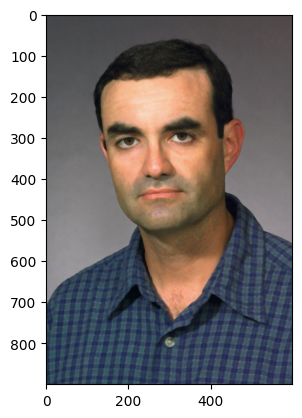

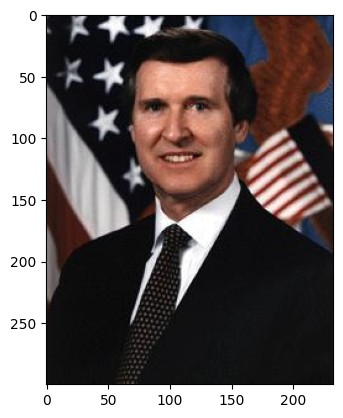

In [ ]:
# plotting the test image and the recognised image

import matplotlib.pyplot as plt

# recognised image
f1 = Image.open('/content/pic00749.jpg')

# test image
f2 = Image.open('/content/pic00839.jpg')

plt.imshow(f1)
plt.show()

plt.imshow(f2)
plt.show()